In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("D:/Study/MCA/4th Sem/DA/csv/HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
X = df.groupby('left')
X.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
X = df['left']
X.mean()

0.2380825388359224

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0                  11428            11428           11428   
1                   3571             3571            3571   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0                    11428               11428          11428   
1                     3571                3571           3571   

      promotion_last_5years  Departments   salary  
left                                               
0                     11428         11428   11428  
1                      3571          3571    3571  


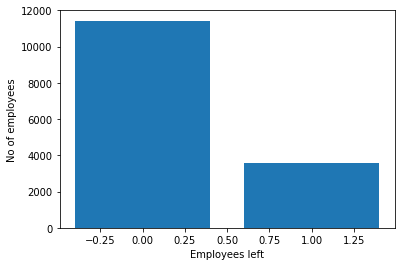

In [20]:
# X -> employess left
X = df.groupby('left').count()
print(X)
plt.bar(X.index.values, X['satisfaction_level'])
plt.xlabel('Employees left')
plt.ylabel('No of employees')
plt.show()

# Calculate no of employees left

In [18]:
df.left.value_counts()
# So the employees who left are - 3571. 11428 stayed.

0    11428
1     3571
Name: left, dtype: int64

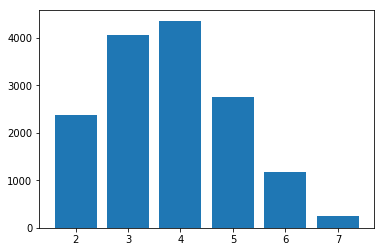

In [33]:
n_projects = df.groupby('number_project').count()
plt.bar(n_projects.index.values, n_projects['satisfaction_level'])
plt.show()

# Find out the minimum 3 group of employees based on satisfaction level and the evaluation of the employee

In [41]:
emp_left = df[['satisfaction_level', 'last_evaluation']]
km = KMeans(n_clusters = 3, random_state = 0).fit(emp_left)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


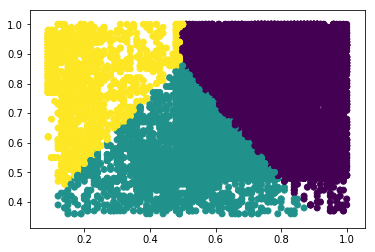

In [43]:
emp_left['label'] = km.labels_
plt.scatter(emp_left['satisfaction_level'], emp_left['last_evaluation'], c = emp_left['label'])

# Group 1 : high satisfaction and high evalation Group 2: Low satisfaction and high Evaluation Group 3: moderate satisfaction and moderate evaluation

In [ ]:
Yellow = Low satisfaction and high Evaluation Group 
Violet = High satisfaction and high evaluation group
Green =  Moderate satisfaction and moderate evaluation group

# Predict how many employees in the organization may leave according to the pattern modelled earlier with 3 groups

In [54]:
leave = preprocessing.LabelEncoder()
df['salary'] = leave.fit_transform(df['salary'])
df['Departments '] = leave.fit_transform(df['Departments '])

In [63]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
Y = df['left']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
logR = LogisticRegression()
logR.fit(X_train, Y_train)
predR = logR.predict(X_test)
print(predR)

[0 0 0 ... 0 0 0]


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
print("Accuracy:", metrics.accuracy_score(Y_test, predR))
print("Precision:", metrics.precision_score(Y_test, predR))
print("Recall:", metrics.recall_score(Y_test, predR))

Accuracy: 0.7602222222222222
Precision: 0.4932301740812379
Recall: 0.23787313432835822


# Employees who have not left

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0                  11428            11428           11428   
1                   3571             3571            3571   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0                    11428               11428          11428   
1                     3571                3571           3571   

      promotion_last_5years  Departments   salary  
left                                               
0                     11428         11428   11428  
1                      3571          3571    3571  


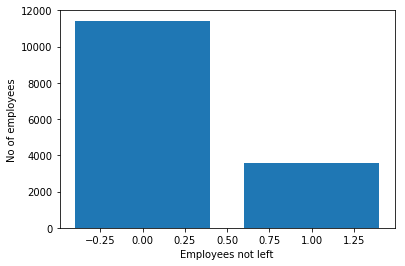

In [31]:
X = df.groupby('left').count()
print(X)
plt.bar(X.index.values, X['satisfaction_level'])
plt.xlabel('Employees not left')
plt.ylabel('No of employees')
plt.show()
# employees who have not left are - 11428